In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('homeprices_banglore.csv')
df.sample(5)

,area,bedrooms,price
14,2250,3,101.0
16,1180,3,48.0
9,3700,5,167.0
8,1310,3,50.0
2,1440,3,62.0


In [3]:
#Performing scaling as the columns are on different scale
from sklearn import preprocessing
sx = preprocessing.MinMaxScaler()
sy = preprocessing.MinMaxScaler()

x_scaled = sx.fit_transform(df.drop('price', axis = 1))
y_scaled = sy.fit_transform(df['price'].values.reshape(df.shape[0], 1))

print(x_scaled)

[[0.08827586 0.25      ]
 [0.62068966 0.75      ]
 [0.22068966 0.5       ]
 [0.24862069 0.5       ]
 [0.13793103 0.25      ]
 [0.12758621 0.25      ]
 [0.6662069  0.75      ]
 [0.86206897 0.75      ]
 [0.17586207 0.5       ]
 [1.         1.        ]
 [0.34482759 0.5       ]
 [0.68448276 0.75      ]
 [0.06896552 0.25      ]
 [0.10344828 0.25      ]
 [0.5        0.5       ]
 [0.12931034 0.25      ]
 [0.13103448 0.5       ]
 [0.25517241 0.5       ]
 [0.67931034 0.5       ]
 [0.         0.        ]]


In [4]:
y_scaled

array([[0.05237037],
       [0.65185185],
       [0.22222222],
       [0.31851852],
       [0.14074074],
       [0.04444444],
       [0.76296296],
       [0.91111111],
       [0.13333333],
       [1.        ],
       [0.37037037],
       [0.8       ],
       [0.04444444],
       [0.05925926],
       [0.51111111],
       [0.07407407],
       [0.11851852],
       [0.20740741],
       [0.51851852],
       [0.        ]])

In [5]:
#Due to scaling the target column had become 2D which should be changed into 1D
y_scaled.reshape(20,)

array([0.05237037, 0.65185185, 0.22222222, 0.31851852, 0.14074074,
       0.04444444, 0.76296296, 0.91111111, 0.13333333, 1.        ,
       0.37037037, 0.8       , 0.04444444, 0.05925926, 0.51111111,
       0.07407407, 0.11851852, 0.20740741, 0.51851852, 0.        ])

Batch Gardient Descent

In [6]:
#Implementing batch gradient descent
def batch_gradient_descent(x, y_true, epochs, learning_rate = 0.01):
    number_of_features = x.shape[1] #no. of columns
    w = np.ones(shape = (number_of_features))
    b = 0
    total_samples = x.shape[0] #no. of rows

    cost_list = []
    epoch_list = []

    for i in range(epochs):
        y_predicted = np.dot(w, x.T) + b
        
        w_grad = -(2/total_samples)*(x.T.dot(y_true-y_predicted))
        b_grad = -(2/total_samples)*np.sum(y_true-y_predicted)

        w = w - learning_rate*w_grad
        b = b - learning_rate*b_grad

        cost = np.mean(np.square(y_true-y_predicted)) #MSE

        if i%10 == 0:
            cost_list.append(cost)
            epoch_list.append(i)

    return w, b, cost, cost_list, epoch_list

In [7]:
w, b, cost, cost_list, epoch_list = batch_gradient_descent(x_scaled, y_scaled.reshape(y_scaled.shape[0],), 500)
w, b, cost

(array([0.70712464, 0.67456527]),
 np.float64(-0.23034857438407427),
 np.float64(0.0068641890429808105))

Text(0, 0.5, 'cost')

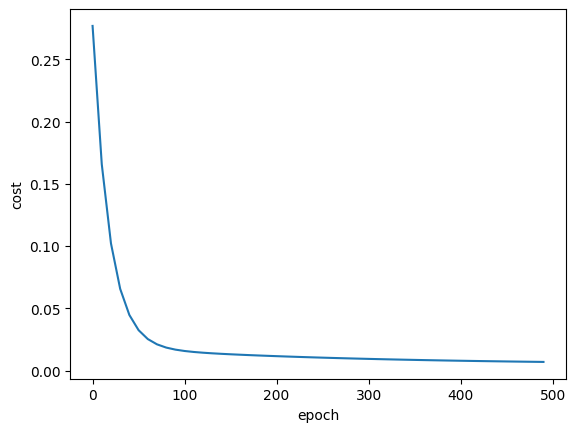

In [8]:
plt.plot(epoch_list, cost_list)
plt.xlabel('epoch')
plt.ylabel('cost')

In [9]:
def predict(area, bedrooms, w, b):
    x_scaled = sx.transform([[area, bedrooms]])[0]
    scaled_price = w[0]*x_scaled[0] + w[1]*x_scaled[1] + b
    return sy.inverse_transform([[scaled_price]])[0][0] 
    # resacling back to original value and from 2D array to single value

In [10]:
predict(2600, 4, w, b)

C:\Users\laxma\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


np.float64(128.45484403267596)

In [11]:
predict(1000, 2, w, b)

C:\Users\laxma\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


np.float64(30.253094462442355)

Stochastic Gradient Descent

In [12]:
import random

In [31]:
#Implementing Stochastic gradient descent
def Stochastic_gradient_descent(x, y_true, epochs, learning_rate = 0.01):
    number_of_features = x.shape[1] #no. of columns
    w = np.ones(shape = (number_of_features))
    b = 0
    total_samples = x.shape[0] #no. of rows

    cost_list = []
    epoch_list = []

    for i in range(epochs):
        random_index = np.random.randint(0, total_samples - 1)
        sample_x = x[random_index]
        sample_y = y_true[random_index]
        
        y_predicted = np.dot(w, sample_x.T) + b
        
        w_grad = -(2/total_samples)*(sample_x.T.dot(sample_y-y_predicted))
        b_grad = -(2/total_samples)*(sample_y-y_predicted)

        w = w - learning_rate*w_grad
        b = b - learning_rate*b_grad

        cost = np.square(sample_y-y_predicted) #MSE

        if i%100 == 0:
            cost_list.append(cost)
            epoch_list.append(i)

    return w, b, cost, cost_list, epoch_list

In [14]:
w_sgd, b_sgd, cost_sgd, cost_list_sgd, epoch_list_sgd = Stochastic_gradient_descent(x_scaled, y_scaled.reshape(y_scaled.shape[0],), 10000)
w_sgd, b_sgd, cost_sgd

(array([0.71910643, 0.70423708]),
 np.float64(-0.2582506934466027),
 np.float64(0.0001957270639837213))

Text(0, 0.5, 'cost')

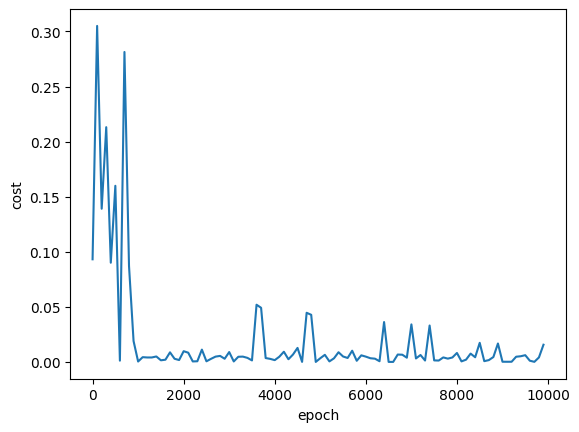

In [15]:
plt.plot(epoch_list_sgd, cost_list_sgd)
plt.xlabel('epoch')
plt.ylabel('cost')

In [16]:
predict(2600, 4, w_sgd, b_sgd)

C:\Users\laxma\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


np.float64(128.69632067896856)

In [17]:
predict(1000, 2, w_sgd, b_sgd)

C:\Users\laxma\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


np.float64(27.599286765752943)

Mini Batch Gradient Descent

In [26]:
#Implementing batch gradient descent
def MiniBatch_gradient_descent(x, y_true, epochs = 100, batch_size = 5, learning_rate = 0.01):
    number_of_features = x.shape[1] #no. of columns
    w = np.ones(shape = (number_of_features))
    b = 0
    total_samples = x.shape[0] #no. of rows

    if batch_size > total_samples: #Ensures the batch size does not exceed the total samples
        batch_size = total_samples

    cost_list = []
    epoch_list = []

    num_batches = int(total_samples/batch_size)
    
    for i in range(epochs):
        random_indices = np.random.permutation(total_samples)
        x_tmp = x[random_indices]
        y_tmp = y_true[random_indices]

        for j in range(0, total_samples, batch_size):
            xj = x_tmp[j:j+batch_size]
            yj = y_tmp[j:j+batch_size]
            y_predicted = np.dot(w, xj.T) + b
        
            w_grad = -(2/len(xj))*(xj.T.dot(yj-y_predicted))
            b_grad = -(2/len(xj))*np.sum(yj-y_predicted)
    
            w = w - learning_rate*w_grad
            b = b - learning_rate*b_grad
    
            cost = np.mean(np.square(yj-y_predicted)) #MSE
    
            if i%10 == 0:
                cost_list.append(cost)
                epoch_list.append(i)
    
    return w, b, cost, cost_list, epoch_list

In [27]:
w_mbgd, b_mbgd, cost_mbgd, cost_list_mbgd, epoch_list_mbgd = MiniBatch_gradient_descent(x_scaled, y_scaled.reshape(y_scaled.shape[0],), epochs = 120, batch_size = 5)
w_mbgd, b_mbgd, cost_mbgd

(array([0.70998231, 0.67806176]),
 np.float64(-0.23346227392386068),
 np.float64(0.003168297739761519))

Text(0, 0.5, 'cost')

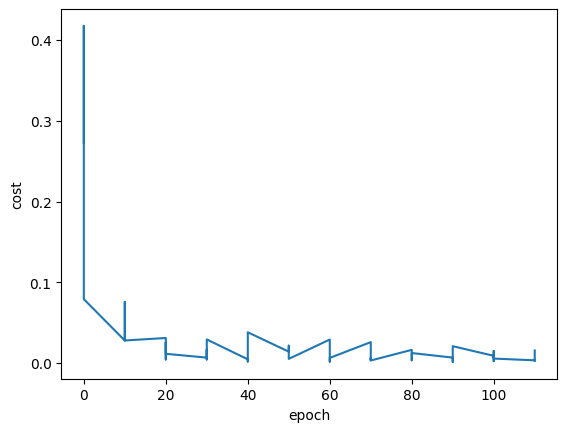

In [28]:
plt.plot(epoch_list_mbgd, cost_list_mbgd)
plt.xlabel('epoch')
plt.ylabel('cost')

In [29]:
predict(2600, 4, w_mbgd, b_mbgd)

C:\Users\laxma\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


np.float64(128.62796767697125)

In [30]:
predict(1000, 2, w_mbgd, b_mbgd)

C:\Users\laxma\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


np.float64(29.977357651370202)